# 1. 수입식품 EDA-Data split

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn
get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율(%)' : (df.isnull().sum()/len(df)).round(2),
                       '고유값 수(nunique)' : df.nunique(),
                      })
    for col in tf.index:
        tf.loc[col, '자료 내용(contents)'] = str(df[col].unique()[0:5])
        
    return tf

# 1. 데이터 확보

In [3]:
df = pd.read_pickle('../../pkl/가공식품-import-food-16-21.pkl')
df.shape

df = df[~df['접수번호'].duplicated()]
df.shape

df = df[(df['판정결과'] == '적합') | (df['판정결과'] == '부적합')]
df['판정결과'] = df['판정결과'].replace({'적합' : 0, '부적합': 1})
df.shape

df = df[(df['검사종류'].str.contains('정밀')) | (df['검사종류'].str.contains('무작위'))]
df.shape
df.head(3)

(714413, 65)

(423589, 65)

(418820, 65)

(393305, 65)

,접수번호,제품구분,접수일,신고시기,품목코드,품목명,제품명,제품명(한글),용도코드,용도명,...,부족합조치예정일,통관진행상태,검사종류 대분류,검사종류 대분류명,최종결과 일련번호,검사코드,선별,검사종류,비고,최종결과일련번호
1,201600214072,가공식품,2016-05-31 09:50:09,본신고,C0130030000000000000,서류가공품,CAVENDISH STRAIGHT CUT,스트레이트 컷,1,판매용,...,NaN,NaN,4.0,무작위표본,64010.0,450,NaN,무작위(자체계획에 의한 검사),NaN,NaN
2,201600217150,가공식품,2016-06-02 09:28:22,본신고,C0127030000000000000,청주,GANBARE TOUCHAN PACK(900ML),간바래 오도상팩(900미리리터),1,판매용,...,NaN,NaN,3.0,정밀,64022.0,370,NaN,정밀(본부 지시에 의한 검사),NaN,NaN
3,201600231480,가공식품,2016-06-14 11:35:10,본신고,C0121020000000000000,소스류,HOT PEPPER SAUCE,정제뉴러우 유라죠우,1,판매용,...,NaN,NaN,4.0,무작위표본,45355.0,411,NaN,무작위(검사강화 국가별품목),NaN,NaN


In [4]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.00,393305,['201600214072' '201600217150' '201600231480' ...
제품구분,object,0,0.00,1,['가공식품']
접수일,object,0,0.00,390007,['2016-05-31 09:50:09' '2016-06-02 09:28:22' '...
신고시기,object,0,0.00,2,['본신고' '사전신고']
품목코드,object,0,0.00,441,['C0130030000000000000' 'C0127030000000000000'...
...,...,...,...,...,...
검사코드,object,0,0.00,38,['450' '370' '411' '410' '310']
선별,object,312975,0.80,2,[nan '자동' '수동']
검사종류,object,0,0.00,38,['무작위(자체계획에 의한 검사)' '정밀(본부 지시에 의한 검사)' '무작위(검사...
비고,object,358407,0.91,11699,"[nan '방사능(일본, 모든제품, 요오드, 세슘) -1' '위해도 점수 : 0.4..."


In [5]:
df['순중량(Kg)_log'] = np.log(df['순중량(Kg)'])
df['과세가격_log'] = np.log(df['과세가격'])

<Figure size 1008x432 with 0 Axes>

<AxesSubplot:xlabel='제품구분', ylabel='순중량(Kg)_log'>

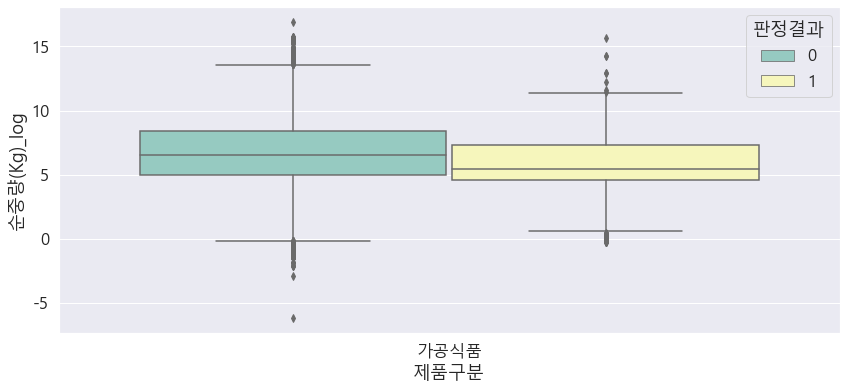

In [6]:
sns.set(font_scale=1.5)
plt.rcParams['font.family']='Malgun Gothic' #한글 폰트 사용
plt.figure(figsize=(14,6))
sns.boxplot(x ='제품구분', y = "순중량(Kg)_log",  hue = "판정결과", palette = "Set3", data = df)

### 특정 수치형 변수(col2)의 범주 유형별(col1) 그래프

<AxesSubplot:>

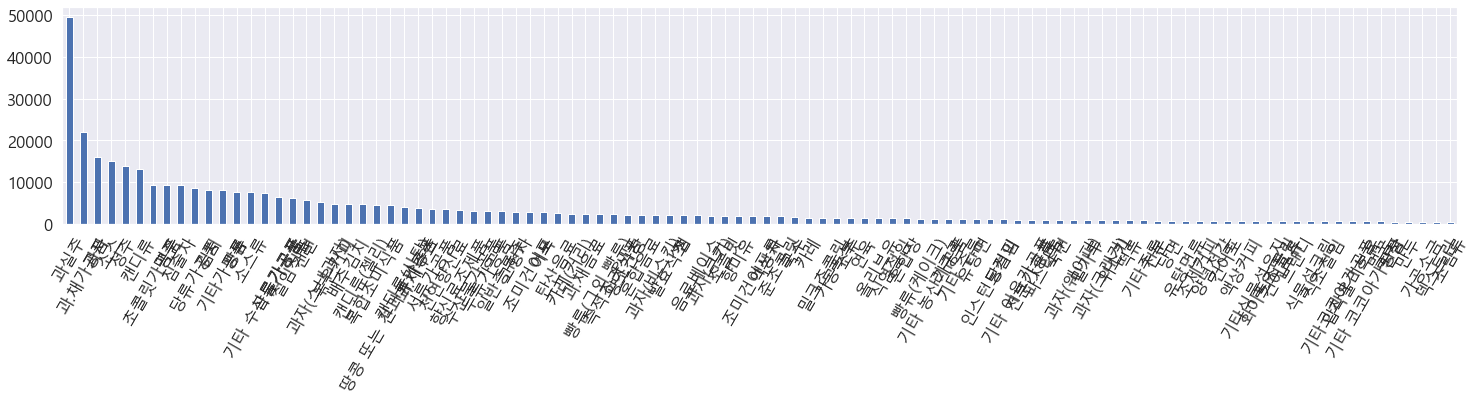

In [7]:
df['품목명'].value_counts().nlargest(100).plot(kind='bar', rot=60, figsize=(25,4))

<AxesSubplot:>

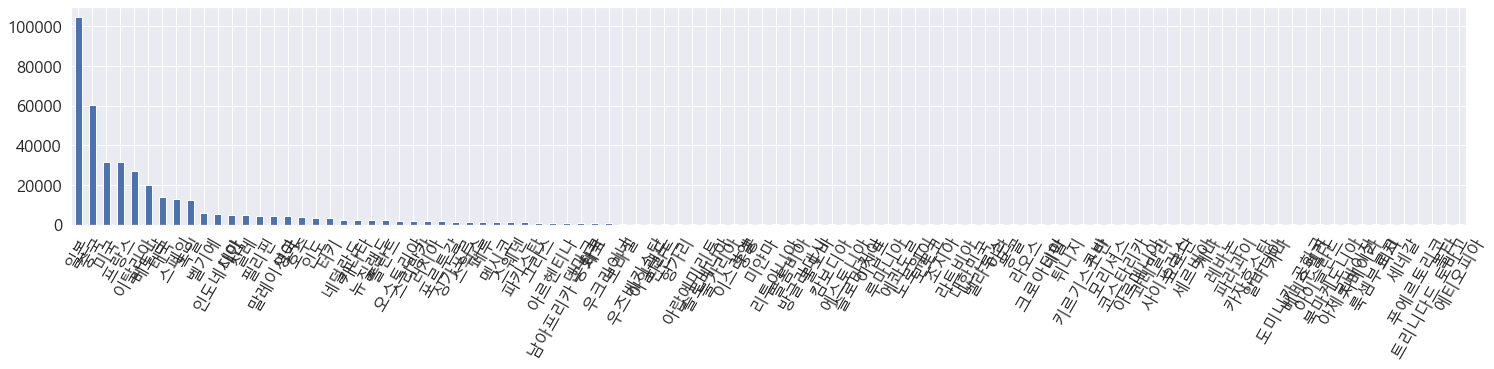

In [8]:
df['제조국(원산지)'].value_counts().nlargest(100).plot(kind='bar', rot=60, figsize=(25,4))

In [9]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.00,393305,['201600214072' '201600217150' '201600231480' ...
제품구분,object,0,0.00,1,['가공식품']
접수일,object,0,0.00,390007,['2016-05-31 09:50:09' '2016-06-02 09:28:22' '...
신고시기,object,0,0.00,2,['본신고' '사전신고']
품목코드,object,0,0.00,441,['C0130030000000000000' 'C0127030000000000000'...
...,...,...,...,...,...
검사종류,object,0,0.00,38,['무작위(자체계획에 의한 검사)' '정밀(본부 지시에 의한 검사)' '무작위(검사...
비고,object,358407,0.91,11699,"[nan '방사능(일본, 모든제품, 요오드, 세슘) -1' '위해도 점수 : 0.4..."
최종결과일련번호,float64,29403,0.07,281527,[ nan 10006037. 5197121. 3316907. 1724...
순중량(Kg)_log,float64,0,0.00,45254,[ 9.87508808 10.16277015 7.32118856 5.192956...


In [10]:
df = df[['품목명', '용도명', '제조국(원산지)', '과세가격($/Kg)', '유기식품 여부', '영유아섭취대상', 
           '주문자상표부착', '유전자변형식품', '가온보존대상', '진균수시험대상', '방사선조사식품', '판정결과', 
           '순중량(Kg)_log', '과세가격_log']]
df.head()

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log
1,서류가공품,판매용,캐나다,1.238,아니오,아니오,아니오,해당없음,N,N,N,0,9.875088,10.088854
2,청주,판매용,일본,3.636,아니오,아니오,아니오,해당없음,N,N,N,0,10.162770,11.453674
3,소스류,판매용,중국,2.004,아니오,아니오,아니오,표시하지않음,N,N,N,0,7.321189,8.016318
4,과실주,판매용,프랑스,5.733,아니오,아니오,아니오,해당없음,N,N,N,0,5.192957,6.939254
5,만두류,판매용,중국,4.540,아니오,아니오,아니오,해당없음,N,N,N,0,7.677864,9.190852


In [11]:
data= df.copy()

## <font color ='blue'> 데이터 전처리(데이터 줄이기)

- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
- https://www.kaggle.com/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival
- https://pydataset.readthedocs.io/en/latest/_modules/dataset/correlations.html

In [12]:
import math
import scipy.stats as ss
from collections import Counter

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [13]:
columns = data.columns
theilu = pd.DataFrame(index=['판정결과'], columns= columns)


def cat_corr (df):
    
    for j in range(0,len(columns)):
        u = theil_u(df['판정결과'].tolist(),df[columns[j]].tolist())
        theilu.loc[:,columns[j]] = u
    theilu.fillna(value=np.nan,inplace=True)

    plt.figure(figsize=(30,2))
    sns.heatmap(theilu,annot=True,fmt='.2f')

    plt.show()

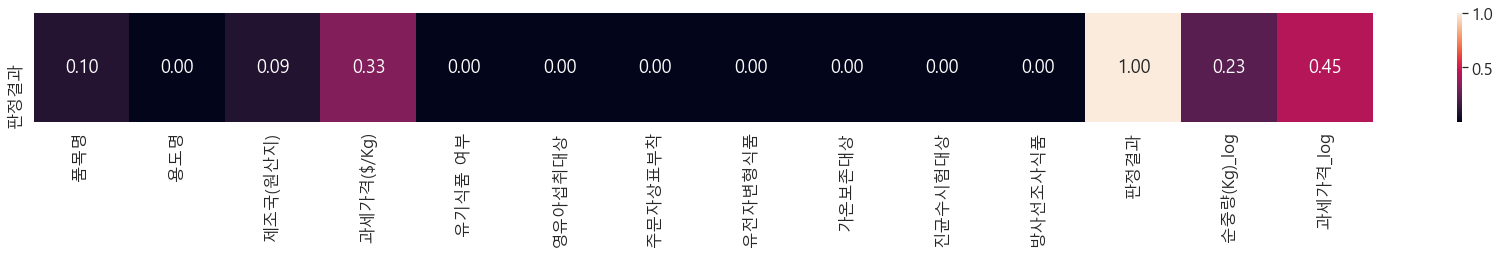

In [14]:
cat_corr(data)

## step1. 과세가격
### 과거 부적합 결과의 최대값과 최소값의 안에 있는 데이터만 확인

array([<AxesSubplot:title={'center':'과세가격_log'}, xlabel='판정결과'>,
       <AxesSubplot:title={'center':'순중량(Kg)_log'}, xlabel='판정결과'>],
      dtype=object)

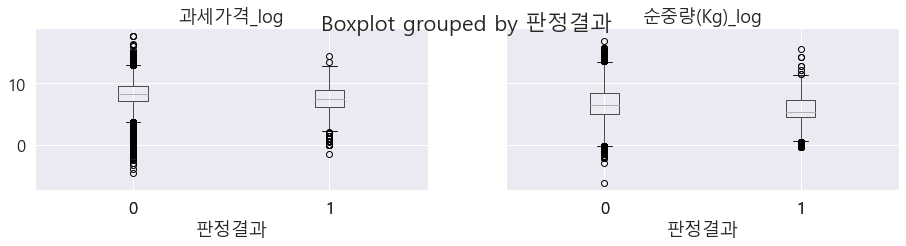

In [15]:
data.boxplot(column=['과세가격_log', '순중량(Kg)_log'], by='판정결과', figsize=(15,3))

In [16]:
upper = data[data['판정결과'] == 1]['과세가격_log'].max()
lower = data[data['판정결과'] == 1]['과세가격_log'].min()
data[data['과세가격_log'] > upper]['판정결과'].value_counts()
data[data['과세가격_log'] < lower]['판정결과'].value_counts()

0    18
Name: 판정결과, dtype: int64

0    75
Name: 판정결과, dtype: int64

In [17]:
data.shape
df_filtered = data[(data['과세가격_log'] <= upper) & (data['과세가격_log'] >= lower)]
df_filtered.shape

(393305, 14)

(393212, 14)

## step2. 순중량

In [18]:
tf = df_filtered[df_filtered['판정결과'] == 1]['순중량(Kg)_log']
q1, q3 =tf.quantile(0.25), tf.quantile(0.75)
iqr = q3 - q1
l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr
(l_fence, u_fence)
outliers = tf[(tf < l_fence) | (tf > u_fence)] 

(0.4925004455983659, 11.459619753304302)

upper = data[data['판정결과'] == 1]['순중량(Kg)_log'].max()
lower = data[data['판정결과'] == 1]['순중량(Kg)_log'].min()

In [19]:
data.shape
df_filtered = df_filtered[(df_filtered['순중량(Kg)_log'] <= u_fence) & (df_filtered['순중량(Kg)_log'] >= l_fence)]
df_filtered.shape

(393305, 14)

(388839, 14)

## step3. 부적합이 전혀없는 유형

In [20]:
not_unfit_ever = df_filtered.groupby('품목명')['판정결과'].mean()[df_filtered.groupby('품목명')['판정결과'].mean() == 0].index
type(not_unfit_ever)
not_unfit_ever = list(not_unfit_ever)
'/'.join(not_unfit_ever)

pandas.core.indexes.base.Index

'가공두유/갈락토올리고당/갈색설탕/감자전분/개량메주/건조효모제품/결정과당/고구마전분/고올레산해바라기유/고올레산홍화유/고추씨기름/고추장/과.채페이스트/과.채퓨레/과.채퓨레.페이스트/과당/과자(유밀과)/과자(한과류)/기타 건포류/기타 코코아가공품/기타건포류/기타과당/기타두유/기타면류/기타면류(수제비)/기타밀가루/기타설탕/기타엿/기타올리고당/기타잼/기타전분/기타코코아가공품/김칫속/냉면/농축과,채즙(또는과.채분)/농축과.채즙(또는 과채분)/당시럽류/대두분/덱스트린/동결건조로얄젤리/된장/두유/두유액/드레싱/땅콩기름/땅콩기름(낙화생유)/떡류/로얄젤리제품/마멀레이드/모조치즈/목화씨기름(면실유)/물엿/밀가루/배아효소함유제품/백설탕/버섯균사체가공식품/분말.결정포도당/분말두유/빵류(도넛)/빵류(식빵)/빵류(파이)/빵류(피자)/빵류(핫도그)/생식제품/설탕/성장기용조제식/소주/쇼트닝/수산물조림/스위트초콜릿/식육 또는 알제품/식육함유가공품/식초절임(매실절임)/식초절임(생강절임)/식해류/신선편의식품/알함유가공품/액상과당/액젓/어육반제품/어육살/어육소시지/연육/연하곤란환자용 점도증진식품/열량 및 영양공급용 식품/열량 및 영양공급용 의료용도식품/영.유아용 이유식/영.유아용 특수조제식품/영?유아용 특수조제식품/영아용조제식/영양강화 밀가루/영양강화밀가루/옥수수기름(옥배유)/올리고당가공품/원액두유/위스키/유바/유함유가공품/인삼.홍삼음료/임산.수유부용식품/자라유제품/자일로올리고당제/재래한식간장/재제소금(재제조소금)/저지방마가린(지방스프레드)/정제,가공을거쳐야하는식품원료/정제소금/정제올리브유/조림류/조미김/조미된장/주정/찐쌀/채종유(유채유또는카놀라유)/청국장/추잉껌/추출가공식품/추출식품/춘장/캔디류(양갱)/캔디류(캐러멜)/커피/커피(기타)/코코아매스/코코아버터/코코아분말/탄산수/태움.용융소금/파스타류/팜스테아린유/팜올레인유/팜유/팜핵유/팝콘용옥수수가공품/패밀리밀크초콜릿/포도당/프락토올리고당/한식된장/한식메주/향신료조제품(겨자가공품)/향신료조제품(고추냉이가공품)/현치사포도 잎(식품원료 한시기준 20

In [21]:
df_filtered.shape
df_filtered = df_filtered[~df_filtered['품목명'].isin(not_unfit_ever)]
df_filtered.shape

(388839, 14)

(368123, 14)

In [22]:
df_filtered[df_filtered['품목명'] ==  '가공두유']

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log


## 데이터 제거 결과

In [23]:
unfit= data['판정결과'].mean()*100
print(f'원래 데이터: {data.shape[0]}개, 부적합율: {unfit:.2f}%')
unfit= df_filtered['판정결과'].mean()*100
print(f'데이터 제거: {df_filtered.shape[0]}개, 부적합율: {unfit:.2f}%')

원래 데이터: 393305개, 부적합율: 1.02%
데이터 제거: 368123개, 부적합율: 1.08%


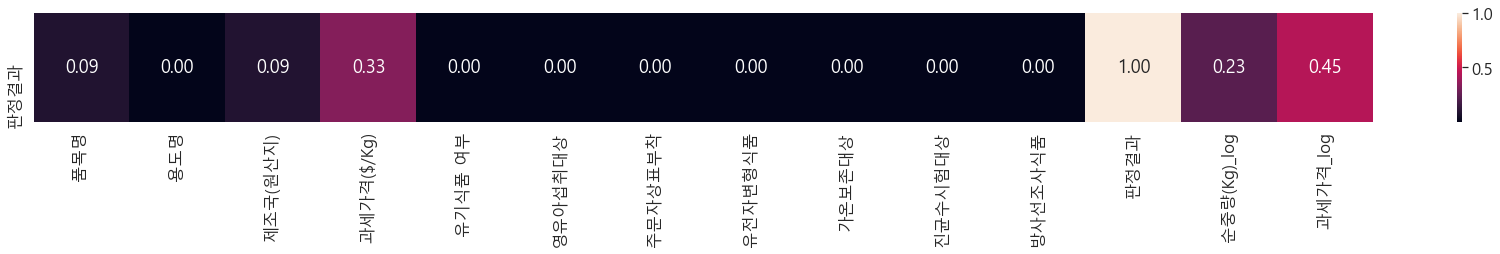

In [24]:
cat_corr(df_filtered)

Text(-0.35000000000000003, 379471.0, '379461')

Text(0.6500000000000001, 8814.0, '8804')

Text(1.6500000000000001, 909.0, '899')

Text(2.6499999999999995, 14.0, '4')

Text(3.6499999999999995, 70.0, '60')

Text(4.6499999999999995, 34.0, '24')

Text(5.6499999999999995, 42.0, '32')

Text(6.6499999999999995, 18.0, '8')

Text(7.6499999999999995, 12.0, '2')

Text(0.049999999999999975, 3932.0, '3922')

Text(1.0499999999999998, 99.0, '89')

Text(2.05, 10, '0')

Text(3.05, 10, '0')

Text(4.05, 10, '0')

Text(5.05, 10, '0')

Text(6.05, 10, '0')

Text(7.05, 10, '0')

Text(8.049999999999999, 10, '0')

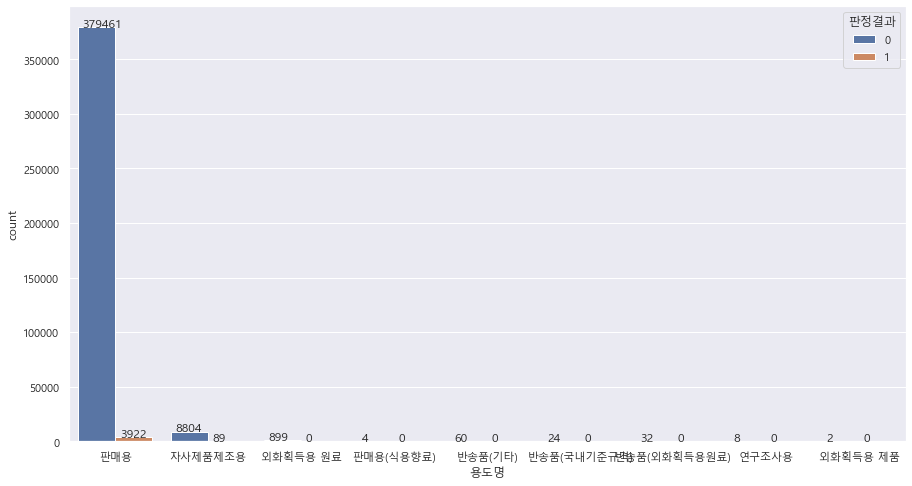

In [25]:
sns.set(rc={'figure.figsize':(15,8)})
plt.rcParams['font.family']='Malgun Gothic'
ax=sns.countplot(x='용도명',hue='판정결과',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

## step4. 국가

In [26]:
not_unfit_ever = df_filtered.groupby('제조국(원산지)')['판정결과'].mean()[df_filtered.groupby('제조국(원산지)')['판정결과'].mean() == 0].index
type(not_unfit_ever)
not_unfit_ever = list(not_unfit_ever)
'/'.join(not_unfit_ever)

pandas.core.indexes.base.Index

'가이아나/과테말라/기니/나미비아/나이지리아/니카라과/대한민국/라트비아/룩셈부르크/르완다/모나코/모로코/모리셔스/몰도바/몰타/바레인/바베이도스/벨라루스/벨리즈/보스니아 헤르체고비나/볼리비아/부탄/북마케도니아/북한/사이프러스/세네갈/세르비아/세이셸/수단/슬로베니아/아르메니아/아제르바이잔/알바니아/알제리/에스와티니/엘살바도르/오만/온두라스/우루과이/자메이카/잠비아/조지아/짐바브웨/쿠바/쿡 제도/탄자니아/통가/튀니지/트리니다드 토바고/파나마/파라과이/푸에르토리코'

In [27]:
df_filtered.shape
df_filtered = df_filtered[~df_filtered['제조국(원산지)'].isin(not_unfit_ever)]
df_filtered.shape

(368123, 14)

(366385, 14)

In [28]:
unfit= data['판정결과'].mean()*100
print(f'원래 데이터: {data.shape[0]}개, 부적합율: {unfit:.2f}%')
unfit= df_filtered['판정결과'].mean()*100
print(f'데이터 제거: {df_filtered.shape[0]}개, 부적합율: {unfit:.2f}%')

원래 데이터: 393305개, 부적합율: 1.02%
데이터 제거: 366385개, 부적합율: 1.08%


# 데이터 축소로 인한 예측 모형 개선 확인

## ML - prediction with pycaret

In [32]:
df.shape
df_filtered.shape
data1 = df.sample(frac=0.2).copy()
data2 = df_filtered.sample(frac=0.2).copy()
data1.shape
data2.shape

(393305, 14)

(366385, 14)

(78661, 14)

(73277, 14)

In [34]:
from pycaret.classification import *

## 1. original data & predict - data1

In [35]:
exp_name = setup(data = data1, silent=True,
                 target = '판정결과')

,Description,Value
0,session_id,2738
1,Target,판정결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(78661, 14)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,0


In [36]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9898,0.8354,0.0000,0.0000,0.0000,0.0000,0.0000,17.3633
ridge,Ridge Classifier,0.9898,0.0000,0.0036,0.5000,0.0071,0.0069,0.0412,0.3000
knn,K Neighbors Classifier,0.9897,0.5510,0.0000,0.0000,0.0000,-0.0001,-0.0008,15.5533
catboost,CatBoost Classifier,0.9897,0.8022,0.0107,0.4111,0.0208,0.0203,0.0644,4.0433
ada,Ada Boost Classifier,0.9896,0.8050,0.0018,0.1667,0.0035,0.0032,0.0160,2.2833
lightgbm,Light Gradient Boosting Machine,0.9896,0.8202,0.0053,0.1323,0.0102,0.0097,0.0250,0.7033
xgboost,Extreme Gradient Boosting,0.9895,0.8038,0.0018,0.0476,0.0034,0.0028,0.0074,7.4800
rf,Random Forest Classifier,0.9891,0.6995,0.0089,0.1116,0.0164,0.0148,0.0285,4.0933
svm,SVM - Linear Kernel,0.9884,0.0000,0.0107,0.0274,0.0154,0.0131,0.0139,0.6700
gbc,Gradient Boosting Classifier,0.9884,0.8168,0.0337,0.1653,0.0550,0.0519,0.0695,7.5933


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2738, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 2. downsized data & predict - data 2

In [37]:
exp_name = setup(data = data2, silent=True,
                 target = '판정결과')

,Description,Value
0,session_id,950
1,Target,판정결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(73277, 14)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,0


In [38]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9890,0.8405,0.0000,0.0000,0.0000,-0.0001,-0.0005,11.7600
knn,K Neighbors Classifier,0.9890,0.5672,0.0143,0.4901,0.0276,0.0270,0.0802,7.9000
ridge,Ridge Classifier,0.9890,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0005,0.2167
qda,Quadratic Discriminant Analysis,0.9890,0.4999,0.0000,0.0000,0.0000,-0.0002,-0.0011,1.1467
lightgbm,Light Gradient Boosting Machine,0.9890,0.8159,0.0196,0.4035,0.0374,0.0364,0.0867,0.4100
catboost,CatBoost Classifier,0.9890,0.8035,0.0357,0.4917,0.0661,0.0647,0.1284,3.4900
xgboost,Extreme Gradient Boosting,0.9889,0.8129,0.0143,0.4087,0.0273,0.0265,0.0722,4.3167
ada,Ada Boost Classifier,0.9888,0.8052,0.0018,0.0833,0.0035,0.0029,0.0104,1.4533
rf,Random Forest Classifier,0.9886,0.7221,0.0410,0.3196,0.0720,0.0697,0.1097,2.8833
gbc,Gradient Boosting Classifier,0.9872,0.8211,0.0197,0.0884,0.0317,0.0280,0.0363,4.7667


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=950, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 3. A little feature engineering & predict with downsized data

In [46]:
exp_name = setup(data = data2, 
                 silent=True,
                 normalize = True,
                 group_features = ['순중량(Kg)_log', '과세가격_log'],
                 high_cardinality_features = ['품목명', '제조국(원산지)'],
                 feature_interaction = True, 
                 feature_ratio = True,
                 polynomial_features = True,
                 bin_numeric_features = ['순중량(Kg)_log', '과세가격_log'],
                 combine_rare_levels = True,
                 target = '판정결과')

,Description,Value
0,session_id,3314
1,Target,판정결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(73277, 14)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,1


In [47]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9890,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1433
lr,Logistic Regression,0.9889,0.7956,0.0000,0.0000,0.0000,-0.0003,-0.0012,6.9367
ada,Ada Boost Classifier,0.9889,0.8041,0.0000,0.0000,0.0000,-0.0001,-0.0005,3.3267
knn,K Neighbors Classifier,0.9888,0.5571,0.0018,0.0370,0.0034,0.0030,0.0070,2.4933
xgboost,Extreme Gradient Boosting,0.9888,0.7998,0.0195,0.3889,0.0368,0.0356,0.0829,4.7267
catboost,CatBoost Classifier,0.9888,0.8103,0.0089,0.2593,0.0171,0.0164,0.0460,8.3300
rf,Random Forest Classifier,0.9886,0.7411,0.0230,0.2875,0.0426,0.0409,0.0783,1.7933
lightgbm,Light Gradient Boosting Machine,0.9883,0.8125,0.0160,0.1703,0.0292,0.0273,0.0490,0.9300
gbc,Gradient Boosting Classifier,0.9875,0.8171,0.0106,0.0728,0.0186,0.0156,0.0236,12.6967
et,Extra Trees Classifier,0.9866,0.7061,0.0390,0.1339,0.0601,0.0554,0.0666,1.6900


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3314,
                solver='auto', tol=0.001)

## 4. SMOTE with clusters, with removing outlier

In [48]:
exp_name = setup(data = data2, 
                 silent=True,
                 normalize = True,
                 group_features = ['순중량(Kg)_log', '과세가격_log'],
                 feature_interaction = True, 
                 feature_ratio = True,
                 polynomial_features = True,
                 bin_numeric_features = ['순중량(Kg)_log', '과세가격_log'],
                 combine_rare_levels = True,
                 
                 create_clusters = True,
                 remove_outliers = True,
                 fix_imbalance = True, 
                 
                 target = '판정결과')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:43:34
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


KeyboardInterrupt: 

In [42]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9892,0.4999,0.0000,0.0000,0.0000,-0.0005,-0.0013,1.7300
xgboost,Extreme Gradient Boosting,0.9880,0.7996,0.0238,0.1119,0.0392,0.0362,0.0475,29.9867
catboost,CatBoost Classifier,0.9877,0.8007,0.0119,0.0556,0.0196,0.0163,0.0212,100.8700
lightgbm,Light Gradient Boosting Machine,0.9875,0.8101,0.0179,0.0837,0.0294,0.0258,0.0340,3.5300
rf,Random Forest Classifier,0.9858,0.7376,0.0298,0.0748,0.0425,0.0367,0.0407,5.5567
et,Extra Trees Classifier,0.9850,0.7127,0.0357,0.0713,0.0475,0.0409,0.0433,3.3567
gbc,Gradient Boosting Classifier,0.9811,0.7961,0.1012,0.0917,0.0936,0.0845,0.0857,43.2933
dt,Decision Tree Classifier,0.9770,0.5348,0.0833,0.0604,0.0698,0.0585,0.0594,7.4833
ada,Ada Boost Classifier,0.9558,0.7773,0.1845,0.0523,0.0814,0.0660,0.0802,11.6567
knn,K Neighbors Classifier,0.9025,0.5764,0.1964,0.0230,0.0411,0.0226,0.0381,6.6833


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

## 5. SMOTE with clusters, with removing outlier  with 2. data

In [50]:
exp_name = setup(data = data2, silent=True,
                 bin_numeric_features = ['순중량(Kg)_log', '과세가격_log'],
                 fix_imbalance = True,
                 target = '판정결과')

,Description,Value
0,session_id,8320
1,Target,판정결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(73277, 14)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,0


In [51]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9870,0.7138,0.0425,0.1325,0.0644,0.0596,0.0696,6.7367
catboost,CatBoost Classifier,0.9863,0.8139,0.0407,0.1198,0.0573,0.0521,0.0611,21.9933
et,Extra Trees Classifier,0.9859,0.7188,0.0536,0.1215,0.0744,0.0684,0.0743,13.3400
xgboost,Extreme Gradient Boosting,0.9855,0.8028,0.0296,0.0863,0.0408,0.0350,0.0416,9.7700
lightgbm,Light Gradient Boosting Machine,0.9850,0.8148,0.0462,0.0967,0.0604,0.0538,0.0585,1.8700
dt,Decision Tree Classifier,0.9804,0.5397,0.0888,0.0882,0.0883,0.0784,0.0785,2.3867
gbc,Gradient Boosting Classifier,0.9398,0.8022,0.2809,0.0536,0.0900,0.0736,0.1018,12.7167
svm,SVM - Linear Kernel,0.8874,0.0000,0.3857,0.0589,0.0595,0.0458,0.0904,1.0267
knn,K Neighbors Classifier,0.8825,0.6304,0.3235,0.0300,0.0550,0.0364,0.0683,55.6233
ada,Ada Boost Classifier,0.8702,0.7907,0.4472,0.0366,0.0676,0.0491,0.0980,3.4300


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8320, verbose=0,
                       warm_start=False)

In [55]:
model = create_model('lr', fold=5)
tuned_model = tune_model(model, fold=5)
tuned_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8069,0.8087,0.6111,0.0329,0.0625,0.0434,0.1081
1,0.7989,0.8206,0.6481,0.0334,0.0635,0.0444,0.1136
2,0.8015,0.8020,0.6789,0.0357,0.0678,0.0486,0.1230
3,0.8062,0.7973,0.6204,0.0333,0.0631,0.0440,0.1101
4,0.8062,0.8037,0.6852,0.0365,0.0693,0.0503,0.1263
Mean,0.8039,0.8065,0.6487,0.0343,0.0652,0.0461,0.1162
SD,0.0032,0.0080,0.0299,0.0014,0.0027,0.0028,0.0072


<function pycaret.classification.tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Union[str, NoneType] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = False, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, **kwargs) -> Any>

In [57]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# End

In [60]:
 error linie

SyntaxError: invalid syntax (<ipython-input-60-950062d54aee>, line 1)

In [61]:
df_filtered.to_pickle('../../pkl/df_filtered-01.pkl')

### 전체 데이터 확인

In [19]:
df = pd.read_pickle('../../pkl/total-import-food-16-21.pkl').sample(frac=0.2, random_state=11)

In [25]:
import glob
glob.glob('../../pkl/*import-food-16-21.pkl')

['../../pkl\\total-import-food-16-21.pkl',
 '../../pkl\\가공식품-import-food-16-21.pkl',
 '../../pkl\\건강기능식품-import-food-16-21.pkl',
 '../../pkl\\기구또는용기.포장-import-food-16-21.pkl',
 '../../pkl\\농.임산물-import-food-16-21.pkl',
 '../../pkl\\수산물-import-food-16-21.pkl',
 '../../pkl\\식품첨가물-import-food-16-21.pkl',
 '../../pkl\\축산물-import-food-16-21.pkl']

In [45]:
selections = '../../working/selection.xlsx'
with pd.ExcelWriter(selections) as writer:
    for col in df['제품구분'].unique():
        tf = summary(df[df['제품구분'] == col])
        tf.head(2)
        tf.to_excel(writer, sheet_name = col) #raw_data1 시트에 저장

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,8272,['201900227496' 202100318756 '201700401795' '2...
제품구분,object,0,0.0,1,['건강기능식품']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,128243,['201600291236' 202100501207 '201700260680' '2...
제품구분,object,0,0.0,1,['가공식품']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,27230,['201800249865' '201900475995' '201700316913' ...
제품구분,object,0,0.0,1,['농.임산물']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,44978,['201900594489' '201600558486' '202000154296' ...
제품구분,object,0,0.0,1,['수산물']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,12275,[202100148103 '20160070534' '201800267182' 202...
제품구분,object,0,0.0,1,['식품첨가물']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,14280,['IFC018080414' 202000366315 202000691851 'IFD...
제품구분,object,0,0.0,1,['축산물']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,16562,['201800073820' '20160140528' '201900534887' '...
제품구분,object,0,0.0,1,['기구또는용기.포장']


In [47]:
df_filtered.head()
df_filtered.shape

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log
1,서류가공품,판매용,캐나다,1.238,아니오,아니오,아니오,해당없음,N,N,N,0,9.875088,10.088854
2,청주,판매용,일본,3.636,아니오,아니오,아니오,해당없음,N,N,N,0,10.162770,11.453674
3,소스류,판매용,중국,2.004,아니오,아니오,아니오,표시하지않음,N,N,N,0,7.321189,8.016318
4,과실주,판매용,프랑스,5.733,아니오,아니오,아니오,해당없음,N,N,N,0,5.192957,6.939254
5,만두류,판매용,중국,4.540,아니오,아니오,아니오,해당없음,N,N,N,0,7.677864,9.190852


(366061, 14)

In [51]:
path = r'D:\smart food\data'

df_filtered.to_pickle(path+'/df_0524.pkl')